<a href="https://colab.research.google.com/github/Mehmteren/Artificial-Intelligence-Projects-with-Python-Machine-Deep-Learning/blob/main/RecognisingNumbersinaPhotograph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
minst = fetch_openml('mnist_784')

In [ ]:
minst.data.shape

(70000, 784)

In [ ]:
def showimage(dframe, index):
  some_digit = dframe.to_numpy()[index]
  some_digit_image = some_digit.reshape(28, 28)
  plt.imshow(some_digit_image, cmap = 'binary')
  plt.axis('off')
  plt.show()

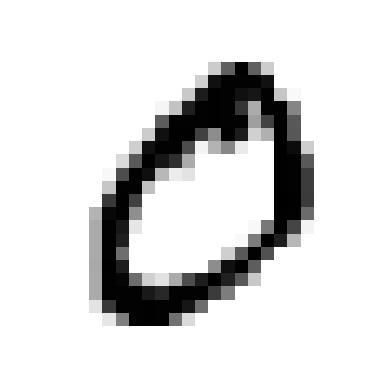

In [ ]:
showimage(minst.data,1)

In [ ]:
train_img, test_img, train_lbl, test_lbl = train_test_split(minst.data, minst.target, test_size=1/7.0, random_state=0)

In [ ]:
type(train_img)

pandas.core.frame.DataFrame

In [ ]:
test_img_copy = test_img.copy()

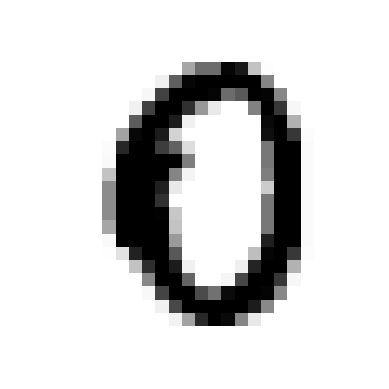

In [ ]:
showimage(test_img_copy,0)

In [ ]:
scaler = StandardScaler()

scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
pca = PCA(.95)

In [ ]:
pca.fit(train_img)

PCA(n_components=0.95)

In [ ]:
print(pca.n_components_)

327


In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

2.aşama

In [ ]:
# Logistic Regression Modelini Tanımla
logisticRegr = LogisticRegression(max_iter=1000)

# Modeli Eğit
logisticRegr.fit(train_img, train_lbl)

# Test Verisi ile Tahmin Yap
predictions = logisticRegr.predict(test_img)

# Model Doğruluğunu Ölç
accuracy = accuracy_score(test_lbl, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 91.86%


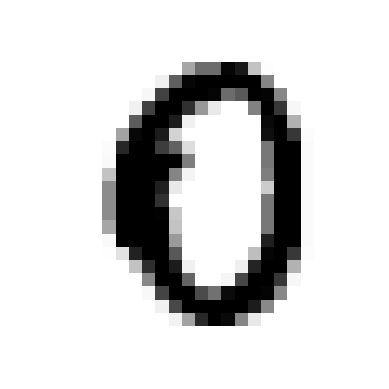

Predicted Label: 0


In [ ]:
showimage(test_img_copy, 0)
print(f"Predicted Label: {predictions[0]}")